<a href="https://colab.research.google.com/github/Aayush-Jain01/Plant-Pathology-Kaggle/blob/main/Plant_Pathology_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import random_split
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data_path = '/content/drive/MyDrive/plant-pathology-2020-fgvc7/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')


In [ ]:
! mkdir /content/drive/MyDrive/plant-pathology-2020-fgvc7/train

mkdir: cannot create directory ‘/content/drive/MyDrive/plant-pathology-2020-fgvc7/train’: File exists


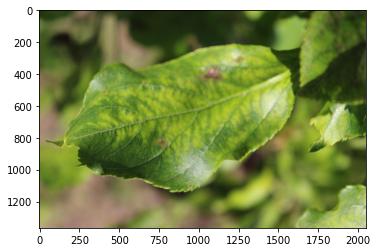

In [ ]:
import cv2
img_path = f'/content/drive/MyDrive/plant-pathology-2020-fgvc7/validation/scab/'
image = cv2.imread(img_path + 'Train_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


In [ ]:
images = f'/content/drive/MyDrive/plant-pathology-2020-fgvc7/'
#train_labels = f'/content/drive/MyDrive/plant-pathology-2020-fgvc7/train.csv'

In [ ]:
import shutil
# for i in range(len(train)):
#   image = cv2.imread(images + str(train['image_id'][i]) + '.jpg')
#   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#   break

def create_dataset(file):
  for i in range(len(file)):
    img_path = images + str(file['image_id'][i]) + '.jpg'
    image_id = file['image_id'][i]
    if file['healthy'][i] == 1:
      shutil.move(img_path, '/content/drive/MyDrive/plant-pathology-2020-fgvc7/train/healthy')
    if file['multiple_diseases'][i] == 1:
      shutil.move(img_path, '/content/drive/MyDrive/plant-pathology-2020-fgvc7/train/multiple_diseases')
    if file['rust'][i] == 1:
      shutil.move(img_path, '/content/drive/MyDrive/plant-pathology-2020-fgvc7/train/rust')
    if file['scab'][i] == 1:
      shutil.move(img_path, '/content/drive/MyDrive/plant-pathology-2020-fgvc7/train/scab')


def create_testset(file):
  for i in range(len(file)):
    img_path = str(images + file['image_id'][i] + '.jpg')
    shutil.move(img_path, '/content/drive/MyDrive/plant-pathology-2020-fgvc7/test/all')




  

In [ ]:
from torchvision import transforms
from torchvision import datasets

In [ ]:
#tried to use shuf and xargs but not serving the purpose

In [ ]:
train_transforms = transforms.Compose([
        transforms.RandomResizedCrop(size=512, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        #transforms.ColorJitter(0.3, 0.3, 0.3, 0.3),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=448),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
      ])
val_transforms = transforms.Compose([
        transforms.Resize(size=512),
        transforms.CenterCrop(size=448),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

train_ds = datasets.ImageFolder('/content/drive/MyDrive/plant-pathology-2020-fgvc7/train', transform=train_transforms)
val_ds = datasets.ImageFolder('/content/drive/MyDrive/plant-pathology-2020-fgvc7/validation', transform=val_transforms)
test_ds = datasets.ImageFolder('/content/drive/MyDrive/plant-pathology-2020-fgvc7/test', transform=val_transforms)

In [ ]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size, shuffle=True)

In [ ]:
batch_size_test = 3
test_dl = DataLoader(test_ds, batch_size_test, shuffle=False)

In [ ]:
from torchvision import models

In [ ]:
#model = models.vgg16(pretrained=True)
model = models.resnet50(pretrained=True)
for parameters in model.parameters():
  parameters.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
# model.classifier[6] = nn.Sequential(
#                           nn.Linear(4096, 256),        #4096 is the no of parameters in VGG-16 here
#                           nn.ReLU(),
#                           nn.Dropout(0.4),
#                           nn.Linear(256, 4),
#                           nn.LogSoftmax(dim=1)
#)

In [ ]:
model.fc = nn.Sequential(
                    nn.Linear(2048, 128),
                    nn.ReLU(),
                    nn.Dropout(0.4),
                    nn.Linear(128, 4),
                    nn.LogSoftmax(dim=1)                   
)

In [ ]:
model.to('cuda')
#model = nn.DataParallel(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
def accuracy(inputs, labels):
  #ps = torch.exp(input)
  _, pred = torch.max(inputs, dim=1)
  matches = torch.sum(pred.cuda() == labels.cuda()).item()/len(pred)
  return matches 


In [ ]:
! pip install torchmetrics

     |████████████████████████████████| 332 kB 13.1 MB/s 


In [ ]:
import torchmetrics
from torchmetrics import AUROC 


In [ ]:
def calc_auroc(inputs, labels):
  #_, pred = torch.max(inputs, dim=1)
  target = torch.reshape(labels, [235])
  preds = torch.reshape(inputs, (235, 4))
  #print(target)
  auroc = AUROC(num_classes=4)
  arc = auroc(preds, target)
  print(arc)

In [ ]:
! pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 12.6 MB/s 


In [ ]:
#import tensorflow
import tensorflow_addons as tfa
#fl = tfa.losses.SigmoidFocalCrossEntropy(alpha, gamma)

In [ ]:
#custom loss func for imbalanced dataset
import math
def cust_loss_func(alpha, gamma, pred, label):
  b = 3.7
  #ce_loss = F.cross_entropy(pred, label, weight= [0.25, 0.25])
  ce_loss = F.cross_entropy(pred, label, weight= torch.tensor([b*math.log(235/60), b*math.log(235/20), b*math.log(235/80) , b*math.log(235/75)], device= 'cuda'))
  #ce_loss = F.cross_entropy(pred, label, reduction= 'mean')
  pt = torch.exp(-ce_loss)
  focal_loss = (alpha*(1 - pt) ** gamma * ce_loss).mean()
  return focal_loss

In [ ]:
import torch.nn.functional as F
loss_func = nn.NLLLoss()
#loss_func = torch.optim.SGD()
optim_func = torch.optim.Adam
#optim_func = torch.optim.SGD
optimizer = optim_func(model.parameters(), 6e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 0.001, epochs=10, steps_per_epoch=len(train_dl))
#scheduler = torch.optim.lr_scheduler.
num_epochs = 30
#lr = 5e-5
train_loss = []
val_loss = []
val_acc = []
for i in range(num_epochs):
  k = 1
  model.train()
  predictions = []
  labels = []
  for batch, label in train_dl:
    optimizer.zero_grad()
    print(k)
    batch = batch.to('cuda')
    output = model(batch)
    loss = cust_loss_func(0.2, 2, output.cuda(), label.cuda())
    #loss = loss_func(output, label.cuda())
    train_loss.append(loss)
    loss.backward()
    optimizer.step()
    k += 1  
  scheduler.step()
  print("Train_Loss = " + str(sum(train_loss)/len(train_loss)))
  
  with torch.no_grad():
    for batch , label in val_dl:
      model.eval()
      batch = batch.to('cuda')
      output = model(batch)
      # predictions = torch.stack((predictions, output), dim= 0)
      # labels = torch.stack((labels, label.cuda()), dim= 0)
      predictions.append(output)
      labels.append(label)
      loss = cust_loss_func(0.2, 2, output.cuda(), label.cuda())
      val_loss.append(loss)
      #calc_auroc(output.cuda(), label.cuda())
      #arc = calc_auroc(output.cuda(), label.cuda())
      acc = accuracy(output.cuda(), label.cuda())
      val_acc.append(acc)
  print("Val_Loss = " + str(sum(val_loss)/len(val_loss)))
  print("Val_Accuracy = " + str(sum(val_acc)/len(val_acc)))
  predictions_ = torch.stack(predictions)
  labels_ = torch.stack(labels)
  arc = calc_auroc(predictions_.cuda(), labels_.cuda()) #AUROC metric only calculates score on entire dataset not every batch as it may happen that the batch does not contain an image belonging to a particular class
  print(" Training_Loss = " + str(sum(train_loss)/len(train_loss)), " Validation_Loss = " + str(sum(val_loss)/len(val_loss)))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Streaming output truncated to the last 5000 lines.
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
Train_Loss = tensor(0.0769, device='cuda:0', grad_fn=<DivBackward0>)
Val_Loss = tensor(0.0730, device='cuda:0')
Val_Accuracy = 0.791205673758868
tensor(0.9232, device='cuda:0')
 Training_Loss = tensor(0.0769, device='cuda:0', grad_fn=<DivBackward0>)  Validation_Loss = tensor(0.0730, device='cuda:0')
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
_, preds = torch.max(torch.reshape(predictions_, (235, 4)), dim= 1)
labels_cm = torch.reshape(labels_, [235])

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(preds.cpu(), labels_cm.cpu())

In [ ]:
cm_df = pd.DataFrame(cm, index= ['Healthy', 'Multiple Diseases', 'Rust', 'Scab'], columns= ['Healthy', 'Multiple Diseases', 'Rust', 'Scab'])

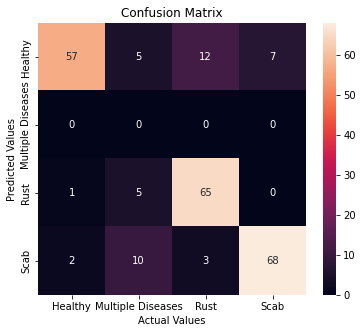

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [ ]:
print(predictions_)
preds = torch.reshape(predictions_, (235, 4))
preds 

tensor([[[-0.0914, -4.7935, -3.4558, -3.0478],
         [-2.7260, -3.0235, -0.1391, -4.1495],
         [-1.6998, -4.1313, -0.2620, -3.4516],
         [-0.6419, -2.1619, -1.2620, -2.5831],
         [-1.1683, -1.8916, -0.8100, -2.3709]],

        [[-3.8105, -4.0844, -4.3066, -0.0539],
         [-0.8423, -2.1539, -1.1065, -2.0993],
         [-2.0343, -2.0151, -1.1280, -0.8861],
         [-2.1956, -1.3375, -0.6800, -2.1235],
         [-2.4527, -2.3214, -0.3680, -2.0901]],

        [[-0.1326, -4.3927, -3.5430, -2.4904],
         [-0.1169, -3.8665, -2.5968, -4.2085],
         [-2.2784, -1.6387, -3.4642, -0.3975],
         [-3.7925, -2.6731, -3.2629, -0.1391],
         [-1.4543, -3.0957, -0.3472, -4.2344]],

        [[-0.0767, -3.8264, -3.3631, -4.0513],
         [-2.7083, -3.1158, -0.1675, -3.1411],
         [-0.5436, -3.0396, -1.2770, -2.3791],
         [-2.2152, -2.9964, -0.2395, -2.9213],
         [-0.3407, -2.3659, -2.4828, -2.1948]],

        [[-2.9797, -2.1434, -2.3041, -0.3119],
     

tensor([[-0.0914, -4.7935, -3.4558, -3.0478],
        [-2.7260, -3.0235, -0.1391, -4.1495],
        [-1.6998, -4.1313, -0.2620, -3.4516],
        [-0.6419, -2.1619, -1.2620, -2.5831],
        [-1.1683, -1.8916, -0.8100, -2.3709],
        [-3.8105, -4.0844, -4.3066, -0.0539],
        [-0.8423, -2.1539, -1.1065, -2.0993],
        [-2.0343, -2.0151, -1.1280, -0.8861],
        [-2.1956, -1.3375, -0.6800, -2.1235],
        [-2.4527, -2.3214, -0.3680, -2.0901],
        [-0.1326, -4.3927, -3.5430, -2.4904],
        [-0.1169, -3.8665, -2.5968, -4.2085],
        [-2.2784, -1.6387, -3.4642, -0.3975],
        [-3.7925, -2.6731, -3.2629, -0.1391],
        [-1.4543, -3.0957, -0.3472, -4.2344],
        [-0.0767, -3.8264, -3.3631, -4.0513],
        [-2.7083, -3.1158, -0.1675, -3.1411],
        [-0.5436, -3.0396, -1.2770, -2.3791],
        [-2.2152, -2.9964, -0.2395, -2.9213],
        [-0.3407, -2.3659, -2.4828, -2.1948],
        [-2.9797, -2.1434, -2.3041, -0.3119],
        [-1.7769, -1.3135, -0.8602

In [ ]:
#print(labels_)
lab = torch.reshape(labels_, [235])
lab

tensor([0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 3, 3, 2, 0, 2, 0, 2, 3, 3, 2, 2, 0,
        2, 3, 3, 0, 3, 0, 1, 2, 2, 3, 0, 0, 1, 0, 2, 0, 3, 2, 0, 2, 2, 0, 3, 1,
        3, 3, 0, 2, 3, 0, 3, 3, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 2, 0, 3, 2, 3, 3,
        0, 2, 0, 2, 2, 3, 0, 3, 2, 3, 3, 3, 0, 1, 0, 3, 2, 2, 1, 2, 2, 0, 0, 2,
        2, 3, 1, 1, 3, 2, 0, 2, 2, 1, 3, 0, 0, 0, 3, 0, 2, 2, 0, 0, 1, 3, 2, 0,
        3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 2, 3, 2, 1, 3, 3, 3, 0, 2, 2,
        0, 3, 3, 0, 2, 2, 1, 1, 3, 3, 2, 0, 1, 2, 2, 3, 0, 2, 0, 2, 3, 3, 0, 2,
        3, 3, 2, 2, 3, 0, 2, 3, 3, 0, 0, 3, 2, 2, 0, 0, 2, 0, 3, 2, 0, 3, 0, 2,
        0, 1, 2, 3, 3, 2, 3, 1, 1, 1, 0, 2, 3, 3, 3, 1, 2, 3, 3, 2, 0, 2, 0, 3,
        3, 2, 2, 2, 3, 3, 1, 0, 3, 3, 0, 3, 2, 2, 1, 2, 2, 2, 3])

In [ ]:
#Test Set Predictions
#import numpy as np
import csv
#img_path = f'/content/drive/MyDrive/plant-pathology-2020-fgvc7/test/all/'
#i = 1
#v = open(test, 'w')
#r = csv.reader(v)
pred_test = []
i = 1
for batch, _ in test_dl:
  #image = torch.from_numpy(image)
  model.eval()
  print(i)
  batch = batch.to('cuda')
  output = model(batch)
  _, pred = torch.max(output, dim = 1)
  pred_test.append(pred)
  i+=1
pred_test_all = torch.stack(pred_test, dim=1)
pred_test_final = torch.reshape(pred_test_all, [1821])
  #print(output)
  # for i in range(8):
  #   if pred[i] == 0:
  #     print("Healthy")
  #   if pred[i] == 1:
  #     print("Multiple Diseases")
  #   if pred[i] == 2:
  #     print("Rust")
  #   if pred[i] == 3:
  #     print("Scab")
  # image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # plt.imshow(image)

In [ ]:
test["pred"] = pred_test_final.cpu()
test["healthy"] = test.apply(lambda x : 1 if x["pred"] == 0 else 0, axis = 1)
test["multiple_diseases"] = test.apply(lambda x : 1 if x["pred"] == 1 else 0, axis = 1)
test["rust"] = test.apply(lambda x : 1 if x["pred"] == 2 else 0, axis = 1)
test["scab"] = test.apply(lambda x : 1 if x["pred"] == 3 else 0, axis = 1)
test = test.drop(columns= ["pred"])
test.to_csv("submission_new.csv", index= False)  
